# Bootstrapping  
diabete dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  

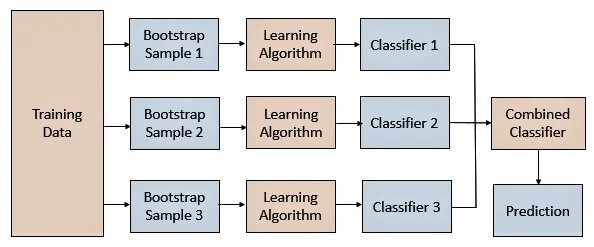

# BaggingClassifier  
make_classification: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html  
BaggingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0).fit(X, y)

clf.fit(X, y)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

# Printing classification report for more detailed metrics
print(classification_report(y_test, y_pred))

(1000, 4)
number of correct sample: 194.0
accuracy: 0.97
con_matrix: [[ 91   4]
 [  2 103]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.96      0.98      0.97       105

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [24]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

ensemble_size = 30
ensemble = BaggingClassifier(estimator=DecisionTreeClassifier(),
                             n_estimators=ensemble_size,
                             oob_score=True)

ensemble.fit(train_x, train_y)

ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

print('Bagging: {}'.format(ensemble_acc))

Bagging: 0.8754208754208754


## BaggingRegressor

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
import numpy as np

np.random.seed(1234)
diabetes = load_diabetes()
train_x, train_y = diabetes.data[:400], diabetes.target[:400]
test_x, test_y = diabetes.data[400:], diabetes.target[400:]


estimator = DecisionTreeRegressor(max_depth=6)
ensemble = BaggingRegressor(estimator=estimator,
                            n_estimators=10)

ensemble.fit(train_x, train_y)
ensemble_predictions = ensemble.predict(test_x)

estimator.fit(train_x, train_y)
single_predictions = estimator.predict(test_x)

ensemble_r2 = metrics.r2_score(test_y, ensemble_predictions)
ensemble_mse = metrics.mean_squared_error(test_y, ensemble_predictions)

single_r2 = metrics.r2_score(test_y, single_predictions)
single_mse = metrics.mean_squared_error(test_y, single_predictions)

print('Bagging r-squared: {}'.format(ensemble_r2))
print('Bagging MSE: {}'.format(ensemble_mse))
print('-'*30)
print('Decision Tree r-squared: {}'.format(single_r2))
print('Decision Tree MSE: {}'.format(single_mse))


Bagging r-squared: 0.5150428606307975
Bagging MSE: 2684.8197699595817
------------------------------
Decision Tree r-squared: 0.14501770368143274
Decision Tree MSE: 4733.35308581562


# Bagging 組合技

多模型結合權重預測輸出

ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 模型1 - KNN

In [27]:
# Load the Titanic dataset
df = sns.load_dataset("titanic")
df.drop(['deck', 'embark_town'], axis=1, inplace=True)
df.dropna(inplace=True)

df.info()

# Split data into inputs and targets
X = df.drop(columns=['survived'])
y = df['survived']

# One-hot encode categorical features
categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alive', 'alone']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create a new KNN model
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

# Use GridSearchCV to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

# Fit model to training data
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

print('--' * 20)
print("Best parameters found: ", knn_gs.best_params_)
print("Best cross-validation score: ", knn_gs.best_score_)


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    712 non-null    int64   
 1   pclass      712 non-null    int64   
 2   sex         712 non-null    object  
 3   age         712 non-null    float64 
 4   sibsp       712 non-null    int64   
 5   parch       712 non-null    int64   
 6   fare        712 non-null    float64 
 7   embarked    712 non-null    object  
 8   class       712 non-null    category
 9   who         712 non-null    object  
 10  adult_male  712 non-null    bool    
 11  alive       712 non-null    object  
 12  alone       712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.4+ KB
----------------------------------------
Best parameters found:  {'n_neighbors': 3}
Best cross-validation score:  0.7346219531128707


### 模型2 - random forest

In [28]:
#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

print('--' * 20)
print("Best parameters found: ", rf_gs.best_params_)
print("Best cross-validation score: ", rf_gs.best_score_)

----------------------------------------
Best parameters found:  {'n_estimators': 100}
Best cross-validation score:  1.0


In [29]:
#test the two models with the test data and print their accuracy scores

print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))

knn: 0.7832167832167832
rf: 1.0


## Voting 

- **Hard Voting**: <br>
In hard voting, the final prediction for a given sample is the majority vote of the predictions from all the individual classifiers. Each classifier votes for a class, and the class with the most votes is chosen as the final prediction. <br>

- **Soft Voting**: <br>
In soft voting, the final prediction for a given sample is based on the average of the predicted probabilities from all the individual classifiers. The class with the highest average probability is chosen as the final prediction. This method requires that the individual classifiers can output probability estimates (e.g., classifiers with predict_proba method). <br>

In [30]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard', n_jobs=-1)

#fit model to training data
ensemble.fit(X_train, y_train)

# predict the test data
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

# Printing classification report for more detailed metrics
print(classification_report(y_test, y_pred))

number of correct sample: 123.0
accuracy: 0.8601398601398601
con_matrix: [[85  0]
 [20 38]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        85
           1       1.00      0.66      0.79        58

    accuracy                           0.86       143
   macro avg       0.90      0.83      0.84       143
weighted avg       0.89      0.86      0.85       143

